In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from games.modules.experimental_statistical_testing.experimental_statistical_tests import (anova,
                                                  tukeys_hsd,
                                                  t_tests,
                                                  BH_correction,
                                                  run_corrected_t_tests,
                                                  repeated_measures_anova)
plt.style.use("/Users/kdreyer/Documents/Github/HBS_GAMES2/src/games/paper.mplstyle.py")
path = "/Users/kdreyer/Documents/Github/HBS_GAMES2/src/games/modules/experimental_statistical_testing/"
path_exp_data = path + "experimental_data/"
path_stats = path + "results/"
path_plots = path + "experimental_data_plots/"

## Figure 1

In [ ]:
df_all = pd.read_csv(path_exp_data+"Exp03_main.csv")
# print(df_all)

### Figure 1C statistical tests

In [ ]:
### red fluorescent protein ###
# select data for red only
df_red = df_all[df_all["condition"].str.contains("red")]
# print(df_red)
# run t-tests
red_comparisons = [
    ["red_normoxic", "red_hypoxic_ice"], 
    ["red_normoxic", "red_hypoxic_rt"], 
    ["red_normoxic", "red_hypoxic_ox_ice"]
]
# t_test_df = run_corrected_t_tests(path_stats, "figure1c_red", "rfu", df_all, red_comparisons)
# print(t_test_df)

# run 1 way anova
# anova_table = anova(path_stats, "figure1c_red", df_red, "rfu", "condition")
# print(anova_table)
# run tukey's hsd
# tukeys_tables = tukeys_hsd(path_stats, "figure1c_red", "rfu", df_red, ["condition"])
# for table in tukeys_tables:
#     print(table)

In [ ]:
### green fluorescent protein ###
# select data for green only
df_green = df_all[df_all["condition"].str.contains("green")]
# run t-tests
green_comparisons = [
    ["green_normoxic", "green_hypoxic_ice"], 
    ["green_normoxic", "green_hypoxic_rt"], 
    ["green_normoxic", "green_hypoxic_ox_ice"]
]
# t_test_df = run_corrected_t_tests(path_stats, "figure1c_green", "rfu", df_all, green_comparisons)
# print(t_test_df)

# run 1 way anova
# anova_table = anova(path_stats, "figure1c_green", df_green, "rfu", "condition")
# print(anova_table)
# run tukey's hsd
tukeys_tables = tukeys_hsd(path_stats, "figure1c_green", "rfu", df_green, ["condition"])
for table in tukeys_tables:
    print(table)

In [ ]:
### blue fluorescent protein ###
# select data for green only
df_blue = df_all[df_all["condition"].str.contains("blue")]
# run t-tests
blue_comparisons = [
    ["blue_normoxic", "blue_hypoxic_ice"], 
    ["blue_normoxic", "blue_hypoxic_rt"], 
    ["blue_normoxic", "blue_hypoxic_ox_ice"]
]
# t_test_df = run_corrected_t_tests(path_stats, "figure1c_blue", "rfu", df_all, blue_comparisons)
# print(t_test_df)

# run 1 way anova
# anova_table = anova(path_stats, "figure1c_blue", df_blue, "rfu", "condition")
# print(anova_table)
# run tukey's hsd
tukeys_tables = tukeys_hsd(path_stats, "figure1c_blue", "rfu", df_blue, ["condition"])
for table in tukeys_tables:
    print(table)

### Figure 1C plot

In [ ]:
df_data_plot = pd.read_csv(path_exp_data+"plot_figure1C_supp_figure3.csv")
df_data_main = df_data_plot[~df_data_plot["condition"].str.contains("f")]
# print(df_data_main)

In [ ]:
# format data and labels for plotting
conditions = df_data_main["condition"].to_list()
plot_xlabels = [conditions[i] for i in range(0, len(conditions), 3)]
rfu = df_data_main["rfu"].to_list()
plot_rfu = [rfu[i:i + 3] for i in range(0, len(rfu), 3)]
std_err = df_data_main["std_err"].to_list()
plot_std_err = [std_err[i:i + 3] for i in range(0, len(std_err), 3)]

# create plot
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
x_ticks = []
for index, rfu_list in enumerate(plot_rfu[:4]):
    ax.bar(index+(index/3)-0.3, rfu_list[2], width=0.3, color="blue", align="center", label="blue")
    ax.errorbar(index+(index/3)-0.3, rfu_list[2], plot_std_err[index][2], color="k", capsize=2, elinewidth=0.5)
    ax.bar(index+(index/3), rfu_list[1], width=0.3, color="green", align="center", label="green")
    ax.errorbar(index+(index/3), rfu_list[1], plot_std_err[index][1], color="k", capsize=2, elinewidth=0.5)
    ax.bar(index+(index/3)+0.3, rfu_list[0], width=0.3, color="red", align="center", label="red")
    ax.errorbar(index+(index/3)+0.3, rfu_list[0], plot_std_err[index][0], color="k", capsize=2, elinewidth=0.5)
    x_ticks.append(index+(index/3))
ax.axhline(y=1.0, color="grey", linestyle="dotted", linewidth=1.5)
ax.set_ylabel("Fluorescence (relative to normoxic control)")
ax.set_xticks(x_ticks)
ax.set_xticklabels(plot_xlabels[:4])

# plt.show()
plt.savefig(path_plots+"figure_1C.svg")

## Supplementary Figure 3

### Supplementary Figure 3 statistical tests

In [ ]:
df_all = pd.read_csv(path_exp_data+"Exp03_supplement.csv")
# print(df_all)

In [ ]:
### red fluorescent protein ###
# select data for red only
df_red = df_all[df_all["condition"].str.contains("red")]
# print(df_red)
# run 1 way anova
# anova_table = anova(path_stats, "supp_figure3_red", df_red, "rfu", "condition")
# print(anova_table)
# run tukey's hsd
tukeys_tables = tukeys_hsd(path_stats, "supp_figure3_red", "rfu", df_red, ["condition"])
for table in tukeys_tables:
    print(table)

In [ ]:
### green fluorescent protein ###
# select data for red only
df_green = df_all[df_all["condition"].str.contains("green")]
# run 1 way anova
# anova_table = anova(path_stats, "supp_figure3_green", df_green, "rfu", "condition")
# print(anova_table)
# run tukey's hsd
tukeys_tables = tukeys_hsd(path_stats, "supp_figure3_green", "rfu", df_green, ["condition"])
for table in tukeys_tables:
    print(table)

In [ ]:
### blue fluorescent protein ###
# select data for red only
df_blue = df_all[df_all["condition"].str.contains("blue")]
# run 1 way anova
# anova_table = anova(path_stats, "supp_figure3_blue", df_blue, "rfu", "condition")
# print(anova_table)
# run tukey's hsd
tukeys_tables = tukeys_hsd(path_stats, "supp_figure3_blue", "rfu", df_blue, ["condition"])
for table in tukeys_tables:
    print(table)

### Supplementary Figure 3 plot

In [ ]:
conditions = df_data_plot["condition"].to_list()
plot_xlabels = [conditions[i] for i in range(0, len(conditions), 3)]
rfu = df_data_plot["rfu"].to_list()
plot_rfu = [rfu[i:i + 3] for i in range(0, len(rfu), 3)]
std_err = df_data_plot["std_err"].to_list()
plot_std_err = [std_err[i:i + 3] for i in range(0, len(std_err), 3)]

# create plot
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
x_ticks = []
for index, rfu_list in enumerate(plot_rfu):
    ax.bar(index+(index/3)-0.3, rfu_list[2], width=0.3, color="blue", align="center", label="blue")
    ax.errorbar(index+(index/3)-0.3, rfu_list[2], plot_std_err[index][2], color="k", capsize=2, elinewidth=0.5)
    ax.bar(index+(index/3), rfu_list[1], width=0.3, color="green", align="center", label="green")
    ax.errorbar(index+(index/3), rfu_list[1], plot_std_err[index][1], color="k", capsize=2, elinewidth=0.5)
    ax.bar(index+(index/3)+0.3, rfu_list[0], width=0.3, color="red", align="center", label="red")
    ax.errorbar(index+(index/3)+0.3, rfu_list[0], plot_std_err[index][0], color="k", capsize=2, elinewidth=0.5)
    x_ticks.append(index+(index/3))
ax.axhline(y=1.0, color="grey", linestyle="dotted", linewidth=1.5)
ax.set_ylabel("Fluorescence (relative to normoxic control)")
ax.set_xticks(x_ticks)
ax.set_xlim([x_ticks[0]-0.8, x_ticks[-1]+0.75])
ax.set_xticklabels(plot_xlabels)
ax.tick_params(axis='x', which='major', labelsize=6)
# plt.show()
plt.savefig(path_plots+"supp_figure_3.svg")

## Figure 2

### Figure 2D-2E statistical tests

In [ ]:
df = pd.read_csv(path_exp_data+"Exp05_pt1.csv")
print(df)

# run t-tests
comparisons = [
    ["cobalt_0", "cobalt_3"], 
    ["cobalt_0", "cobalt_15"], 
    ["cobalt_0", "cobalt_30"],
    ["cobalt_0", "cobalt_150"],
    ["cobalt_0", "cobalt_300"],
    ["cobalt_0", "cobalt_600"]
]
t_test_df = run_corrected_t_tests(path_stats, "figure2d-e", "meptrs", df, comparisons)
print(t_test_df)

### Figure 2D plot

In [ ]:
df_data_plot = pd.read_csv(path_exp_data+"plot_figure2D-E.csv")
# print(df_data_plot)
cobalt_doses = df_data_plot["cobalt_dose"].to_list()
meptrs = df_data_plot["meptrs"].to_list()
meptrs_scaled = [i/1E4 for i in meptrs]
std_err = df_data_plot["std_err"].to_list()
std_err_scaled = [i/1E4 for i in std_err]

# create figure 2D plot
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.errorbar(cobalt_doses, meptrs_scaled, std_err_scaled, color="deeppink", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="k", capsize=2, elinewidth=0.5)
ax.set_xscale('symlog')
ax.set_xlim(right=1000)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_xlabel("CoCl2 dose (uM)")
ax.set_ylabel("Mean reporter expression (x10^4 MEPTRs)")
# plt.show()
plt.savefig(path_plots+"figure_2d.svg")

### Figure 2E plot

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(1.5, 3))

ax.bar(-0.15, meptrs_scaled[0], width=0.3, color="grey", align="center", label="untreated")
ax.bar(0.15, meptrs_scaled[-2], width=0.3, color="deeppink", align="center", label="cobalt")
ax.errorbar(-0.15, meptrs_scaled[0], std_err_scaled[0], color="k", capsize=2, elinewidth=0.5)
ax.errorbar(0.15, meptrs_scaled[-2], std_err_scaled[-2], color="k", capsize=2, elinewidth=0.5)
ax.set_xlim([-0.5, 0.5])
ax.set_xticklabels([])
ax.set_yticks([0, 1, 2, 3])
ax.set_ylabel("Mean reporter expression (x10^6 MEPTRs)")
# plt.show()
plt.savefig(path_plots+"figure_2e.svg")

### Figure 2G statistical tests

In [ ]:
df = pd.read_csv(path_exp_data+"Exp05_pt2.csv")
# print(df)

# run 2-way ANOVA
anova_table = anova(path_stats, "figure2g", df, "meptrs", "condition", "bin")
# print(anova_table)
# run tukey's hsd
tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure2g", "meptrs", df, ["condition", "bin"], ["condition","bin"])
print(tukeys_table_i)
for table in tukeys_tables:
    print(table)

### Figure 2G plot

In [ ]:
df_data_plot = pd.read_csv(path_exp_data+"plot_figure2G.csv")
# print(df_data_plot)

# format data and labels for plotting
meptrs = df_data_plot["meptrs"].to_list()
meptrs_scaled = [i/1E4 for i in meptrs]
plot_meptrs = [meptrs_scaled[i:i + 2] for i in range(0, len(meptrs_scaled), 2)]
std_err = df_data_plot["std_err"].to_list()
std_err_scaled = [i/1E4 for i in std_err]
plot_std_err = [std_err_scaled[i:i + 2] for i in range(0, len(std_err_scaled), 2)]
fi = df_data_plot["FI"].to_list()
plot_fi = [fi[i] for i in range(1, len(fi), 2)]
fi_std_err = df_data_plot["FI_std_err"].to_list()
plot_fi_std_err = [fi_std_err[i] for i in range(1, len(fi_std_err), 2)]
# create plot
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3))
ax2 = ax.twinx()
for index, meptrs_list in enumerate(plot_meptrs):
    ax.bar(index+1-0.175, meptrs_list[0], width=0.35, color="grey", align="center", label="untreated")
    ax.errorbar(index+1-0.175, meptrs_list[0], plot_std_err[index][0], color="k", capsize=2, elinewidth=0.5)
    ax.bar(index+1+0.175, meptrs_list[1], width=0.35, color="deeppink", align="center", label="cobalt")
    ax.errorbar(index+1+0.175, meptrs_list[1], plot_std_err[index][1], color="k", capsize=2, elinewidth=0.5)
    ax2.errorbar(index+1, plot_fi[index], plot_fi_std_err[index], color="red", marker="o", markersize="4", linestyle="none", ecolor="k", capsize=2, elinewidth=0.5)

ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xlim(left=0.5, right=10.5)
ax.set_yticks([0, 2, 4, 6, 8, 10])
ax.set_xlabel("Bin (Decile of EBFP2 expression level)")
ax.set_ylabel("Mean reporter expression (x10^4 MEPTRs)")
ax.spines[['right']].set_visible(True)
ax2.set_yticks([0, 5, 10, 15, 20, 25, 30])
ax2.set_ylabel("Fold induction")
# plt.show()
plt.savefig(path_plots+"figure_2g.svg")

### Figure 2H statistical tests

In [ ]:
df = pd.read_csv(path_exp_data+"Exp06.csv")
# print(df)

# run 2-way ANOVA
# anova_table = anova(path_stats, "figure2h", df, "meptrs", "condition", "sorted_population")
# print(anova_table)
# run tukey's hsd
tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure2h", "meptrs", df, ["condition", "sorted_population"], ["condition","sorted_population"])
print(tukeys_table_i)
for table in tukeys_tables:
    print(table)

### Figure 2H plot

In [ ]:
#plot
df_data_plot = pd.read_csv(path_exp_data+"plot_figure2H.csv")
# print(df_data_plot)

# format data and labels for plotting
meptrs = df_data_plot["meptrs"].to_list()
meptrs_scaled = [i/1E4 for i in meptrs]
plot_meptrs = [meptrs_scaled[i:i + 2] for i in range(0, len(meptrs_scaled), 2)]
std_err = df_data_plot["std_err"].to_list()
std_err_scaled = [i/1E4 for i in std_err]
plot_std_err = [std_err_scaled[i:i + 2] for i in range(0, len(std_err_scaled), 2)]
fi = df_data_plot["FI"].to_list()
plot_fi = [fi[i] for i in range(1, len(fi), 2)]
fi_std_err = df_data_plot["FI_std_err"].to_list()
plot_fi_std_err = [fi_std_err[i] for i in range(1, len(fi_std_err), 2)]
# create plot
fig, ax = plt.subplots(1, 1, figsize=(4.5, 3))
ax2 = ax.twinx()
for index, meptrs_list in enumerate(plot_meptrs):
    ax.bar(index-0.175, meptrs_list[0], width=0.35, color="grey", align="center", label="untreated")
    ax.errorbar(index-0.175, meptrs_list[0], plot_std_err[index][0], color="k", capsize=2, elinewidth=0.5)
    ax.bar(index+0.175, meptrs_list[1], width=0.35, color="deeppink", align="center", label="cobalt")
    ax.errorbar(index+0.175, meptrs_list[1], plot_std_err[index][1], color="k", capsize=2, elinewidth=0.5)
    ax2.errorbar(index, plot_fi[index], plot_fi_std_err[index], color="red", marker="o", markersize="4", linestyle="none", ecolor="k", capsize=2, elinewidth=0.5)

ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xlim(left=-0.5, right=10.5)
# ax.set_yticks([0, 2, 4, 6, 8, 10])
ax.set_xlabel("Sorted population (on decile of EBFP2 expression)")
ax.set_ylabel("Mean reporter expression (x10^4 MEPTRs)")
ax.spines[['right']].set_visible(True)
ax2.set_yticks([0, 100, 200, 300])
ax2.set_ylabel("Fold induction")
# plt.show()
plt.savefig(path_plots+"figure_2h.svg")

## Figure 5

### Figure 5E Statistical Tests

In [ ]:
df = pd.read_csv(path_exp_data+"Exp10.csv")
df_hypoxic = df[df["day"] != "normoxic"].copy()

# run 2-way repeated measures ANOVA
# anova_rm_table = repeated_measures_anova(path_stats, "figure5e", df_hypoxic, "meptrs", "day", "condition")
# print(anova_rm_table)

# run tukey's hsd
# tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure5e", "meptrs", df_hypoxic, ["condition", "day"], ["condition","day"]) 
# print(tukeys_table_i)
# for table in tukeys_tables:
#     print(table)

# run t-tests for each day vs. normoxia for simple, h1a fb, h2a fb
# format df for t-test code
# df["condition"] = df["condition"] + "_" + df["day"].astype(str)
# # print(df)
# comparisons = [
#     ["simple_hbs_0", "simple_hbs_normoxic"],
#     ["simple_hbs_1", "simple_hbs_normoxic"],
#     ["simple_hbs_2", "simple_hbs_normoxic"],
#     ["simple_hbs_3", "simple_hbs_normoxic"],
#     ["simple_hbs_4", "simple_hbs_normoxic"],
#     ["simple_hbs_5", "simple_hbs_normoxic"],
#     ["h1a_fb_hbs_0", "h1a_fb_hbs_normoxic"],
#     ["h1a_fb_hbs_1", "h1a_fb_hbs_normoxic"],
#     ["h1a_fb_hbs_2", "h1a_fb_hbs_normoxic"],
#     ["h1a_fb_hbs_3", "h1a_fb_hbs_normoxic"],
#     ["h1a_fb_hbs_4", "h1a_fb_hbs_normoxic"],
#     ["h1a_fb_hbs_5", "h1a_fb_hbs_normoxic"],
#     ["h2a_fb_hbs_0", "h2a_fb_hbs_normoxic"],
#     ["h2a_fb_hbs_1", "h2a_fb_hbs_normoxic"],
#     ["h2a_fb_hbs_2", "h2a_fb_hbs_normoxic"],
#     ["h2a_fb_hbs_3", "h2a_fb_hbs_normoxic"],
#     ["h2a_fb_hbs_4", "h2a_fb_hbs_normoxic"],
#     ["h2a_fb_hbs_5", "h2a_fb_hbs_normoxic"]
# ]
# t_test_df = run_corrected_t_tests(path_stats, "figure5e", "meptrs", df, comparisons)
# print(t_test_df)

### Figure 5E Plots

In [27]:
df_data_plot = pd.read_csv(path_exp_data+"plot_figure5E.csv")
# print(df_data_plot)
df_hypoxia_data = df_data_plot[df_data_plot["day"] != "baseline"].copy()
df_normoxia_data = df_data_plot[df_data_plot["day"] == "baseline"].copy()
days = [0, 1, 2, 3, 4, 5]
print(df_hypoxia_data)

     condition day        meptrs       std_err
0   simple_hbs   0   12040.80704    312.282542
1   simple_hbs   1  154877.89600   6130.949680
2   simple_hbs   2  265372.41130  13662.930480
3   simple_hbs   3  336921.18320   7840.404946
4   simple_hbs   4  370216.17560   5226.290622
5   simple_hbs   5  462293.43070  17582.092840
7   h1a_fb_hbs   0   23177.12156    253.151753
8   h1a_fb_hbs   1  356957.21860  29984.441360
9   h1a_fb_hbs   2  565157.45270  27392.274240
10  h1a_fb_hbs   3  493611.67360  66369.591010
11  h1a_fb_hbs   4  438987.46880  24267.475310
12  h1a_fb_hbs   5  425260.17510  44036.984030
14  h2a_fb_hbs   0   10255.79969    324.120436
15  h2a_fb_hbs   1  211191.81830   3893.503021
16  h2a_fb_hbs   2  550294.83280  48370.380480
17  h2a_fb_hbs   3  533021.70600  16171.396290
18  h2a_fb_hbs   4  484180.03300  23057.903510
19  h2a_fb_hbs   5  466042.80110  49471.189030


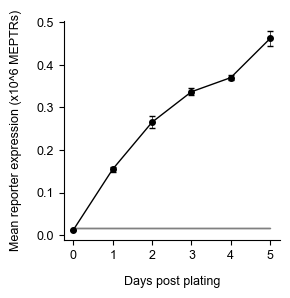

In [39]:
# simple HBS plot
meptrs_hypoxia_simple = df_hypoxia_data[df_hypoxia_data["condition"] == "simple_hbs"]["meptrs"].to_list()
# print(meptrs_hypoxia_simple)
meptrs_hypoxia_simple_scaled = [i/1E6 for i in meptrs_hypoxia_simple]
std_err_hypoxia_simple = df_hypoxia_data[df_hypoxia_data["condition"] == "simple_hbs"]["std_err"].to_list()
# print(std_err_hypoxia_simple)
std_err_hypoxia_simple_scaled = [i/1E6 for i in std_err_hypoxia_simple]

meptrs_normoxia_simple = df_normoxia_data[df_normoxia_data["condition"] == "simple_hbs"]["meptrs"].to_list()[0]
# print(meptrs_normoxia_simple)
meptrs_normoxia_simple_scaled = meptrs_normoxia_simple/1E6
std_err_normoxia_simple = df_normoxia_data[df_normoxia_data["condition"] == "simple_hbs"]["std_err"].to_list()[0]
std_err_normoxia_simple_scaled = std_err_normoxia_simple/1E6

# create figure 2D plot
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.errorbar(days, meptrs_hypoxia_simple_scaled, std_err_hypoxia_simple_scaled, color="black", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="k", capsize=2, elinewidth=0.5)
ax.fill_between(
    days, meptrs_normoxia_simple_scaled-std_err_normoxia_simple_scaled, 
    meptrs_normoxia_simple_scaled+std_err_normoxia_simple_scaled, color="gray")
ax.set_xlabel("Days post plating")
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_ylabel("Mean reporter expression (x10^6 MEPTRs)")
plt.show()
# plt.savefig(path_plots+"figure_5e_simple.svg")

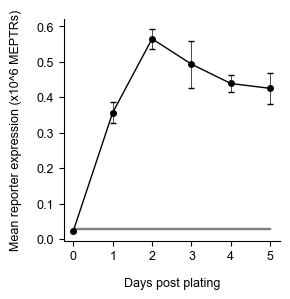

In [40]:
# H1a feedback HBS plot
meptrs_hypoxia_h1a_fb = df_hypoxia_data[df_hypoxia_data["condition"] == "h1a_fb_hbs"]["meptrs"].to_list()
# print()
meptrs_hypoxia_h1a_fb_scaled = [i/1E6 for i in meptrs_hypoxia_h1a_fb]
std_err_hypoxia_h1a_fb = df_hypoxia_data[df_hypoxia_data["condition"] == "h1a_fb_hbs"]["std_err"].to_list()
# print()
std_err_hypoxia_h1a_fb_scaled = [i/1E6 for i in std_err_hypoxia_h1a_fb]

meptrs_normoxia_h1a_fb = df_normoxia_data[df_normoxia_data["condition"] == "h1a_fb_hbs"]["meptrs"].to_list()[0]
# print(meptrs_normoxia_simple)
meptrs_normoxia_h1a_fb_scaled = meptrs_normoxia_h1a_fb/1E6
std_err_normoxia_h1a_fb = df_normoxia_data[df_normoxia_data["condition"] == "h1a_fb_hbs"]["std_err"].to_list()[0]
std_err_normoxia_h1a_fb_scaled = std_err_normoxia_h1a_fb/1E6

# create figure 2D plot
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.errorbar(days, meptrs_hypoxia_h1a_fb_scaled, std_err_hypoxia_h1a_fb_scaled, color="black", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="k", capsize=2, elinewidth=0.5)
ax.fill_between(
    days, meptrs_normoxia_h1a_fb_scaled-std_err_normoxia_h1a_fb_scaled, 
    meptrs_normoxia_h1a_fb_scaled+std_err_normoxia_h1a_fb_scaled, color="gray")
ax.set_xlabel("Days post plating")
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_ylabel("Mean reporter expression (x10^6 MEPTRs)")
plt.show()
# plt.savefig(path_plots+"figure_5e_h1a_fb.svg")

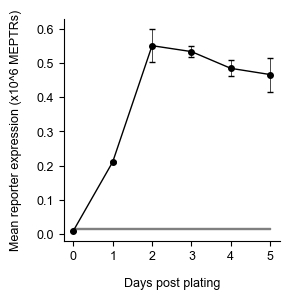

In [41]:
# H2a feedback HBS plot
meptrs_hypoxia_h2a_fb = df_hypoxia_data[df_hypoxia_data["condition"] == "h2a_fb_hbs"]["meptrs"].to_list()
# print()
meptrs_hypoxia_h2a_fb_scaled = [i/1E6 for i in meptrs_hypoxia_h2a_fb]
std_err_hypoxia_h2a_fb = df_hypoxia_data[df_hypoxia_data["condition"] == "h2a_fb_hbs"]["std_err"].to_list()
# print()
std_err_hypoxia_h2a_fb_scaled = [i/1E6 for i in std_err_hypoxia_h2a_fb]

meptrs_normoxia_h2a_fb = df_normoxia_data[df_normoxia_data["condition"] == "h2a_fb_hbs"]["meptrs"].to_list()[0]
# print(meptrs_normoxia_simple)
meptrs_normoxia_h2a_fb_scaled = meptrs_normoxia_h2a_fb/1E6
std_err_normoxia_h2a_fb = df_normoxia_data[df_normoxia_data["condition"] == "h2a_fb_hbs"]["std_err"].to_list()[0]
std_err_normoxia_h2a_fb_scaled = std_err_normoxia_h2a_fb/1E6

# create figure 2D plot
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.errorbar(days, meptrs_hypoxia_h2a_fb_scaled, std_err_hypoxia_h2a_fb_scaled, color="black", linestyle="-", linewidth=1, marker="o", markersize="4", ecolor="k", capsize=2, elinewidth=0.5)
ax.fill_between(
    days, meptrs_normoxia_h2a_fb_scaled-std_err_normoxia_h2a_fb_scaled, 
    meptrs_normoxia_h2a_fb_scaled+std_err_normoxia_h2a_fb_scaled, color="gray")
ax.set_xlabel("Days post plating")
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_ylabel("Mean reporter expression (x10^6 MEPTRs)")
plt.show()
# plt.savefig(path_plots+"figure_5e_h2a_fb.svg")

### Figure 5F

In [ ]:
df = pd.read_csv(path_exp_data+"Exp11.csv")
df_hypoxic = df[df["day"] != "normoxic"].copy()
# print(df_hypoxic)
# run 2-way repeated measures ANOVA
# anova_rm_table = repeated_measures_anova(path_stats, "figure5f", df_hypoxic, "meptrs", "day", "condition")
# print(anova_rm_table)

# run tukey's hsd
# tukeys_table_i, tukeys_tables = tukeys_hsd(path_stats, "figure5f", "meptrs", df_hypoxic, ["condition", "day"], ["condition","day"]) 
# print(tukeys_table_i)
# for table in tukeys_tables:
#     print(table)

# run t-tests for each day vs. normoxia for simple, h1a fb, h2a fb
# format df for t-test code
df["condition"] = df["condition"] + "_" + df["day"].astype(str)
# print(df)
comparisons = [
    ["simple_hbs_0", "simple_hbs_normoxic"],
    ["simple_hbs_1", "simple_hbs_normoxic"],
    ["simple_hbs_2", "simple_hbs_normoxic"],
    ["simple_hbs_3", "simple_hbs_normoxic"],
    ["simple_hbs_4", "simple_hbs_normoxic"],
    ["simple_hbs_5", "simple_hbs_normoxic"],
    ["h1a_fb_hbs_0", "h1a_fb_hbs_normoxic"],
    ["h1a_fb_hbs_1", "h1a_fb_hbs_normoxic"],
    ["h1a_fb_hbs_2", "h1a_fb_hbs_normoxic"],
    ["h1a_fb_hbs_3", "h1a_fb_hbs_normoxic"],
    ["h1a_fb_hbs_4", "h1a_fb_hbs_normoxic"],
    ["h1a_fb_hbs_5", "h1a_fb_hbs_normoxic"],
    ["h2a_fb_hbs_0", "h2a_fb_hbs_normoxic"],
    ["h2a_fb_hbs_1", "h2a_fb_hbs_normoxic"],
    ["h2a_fb_hbs_2", "h2a_fb_hbs_normoxic"],
    ["h2a_fb_hbs_3", "h2a_fb_hbs_normoxic"],
    ["h2a_fb_hbs_4", "h2a_fb_hbs_normoxic"],
    ["h2a_fb_hbs_5", "h2a_fb_hbs_normoxic"]
]
t_test_df = run_corrected_t_tests(path_stats, "figure5f", "meptrs", df, comparisons)
print(t_test_df)